In [8]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.applications import VGG16, Xception, InceptionV3, MobileNet, ResNet50
from tensorflow.keras.preprocessing import image
#importing dependencies
import pandas as pd
import numpy as np
import requests
import json
from bs4 import BeautifulSoup
import csv
import os
import shutil
from collections import defaultdict
from shutil import copy
from shutil import copytree, rmtree


In [30]:
#os.listdir('food-101/images')

In [33]:
# Visualize the data, showing one image per class from 101 classes
# rows = 5
# cols = 6
# fig, ax = plt.subplots(rows, cols, figsize=(10,10))
# fig.suptitle("Showing one random image from each class", y=1.05, fontsize=24) # Adding  y=1.05, fontsize=24 helped me fix the suptitle overlapping with axes issue
# data_dir = "food-101/images/"
# foods_sorted = sorted(os.listdir(data_dir))
# food_id = 0
# for i in range(rows):
#   for j in range(cols):
#     try:
#       food_selected = foods_sorted[food_id] 
#       food_id += 1
#     except:
#       break
#     if food_selected == '.DS_Store':
#         continue
#     food_selected_images = os.listdir(os.path.join(data_dir,food_selected)) # returns the list of all files present in each food category
#     food_selected_random = np.random.choice(food_selected_images) # picks one food item from the list as choice, takes a list and returns one random item
#     img = plt.imread(os.path.join(data_dir,food_selected, food_selected_random))
#     ax[i][j].imshow(img)
#     ax[i][j].set_title(food_selected, pad = 10)
    
# plt.setp(ax, xticks=[],yticks=[])
# plt.tight_layout()
# https://matplotlib.org/users/tight_layout_guide.html

# Data preparation

In [22]:
# Helper method to split dataset into train and test folders
def prepare_data(filepath, src,dest):
  classes_images = defaultdict(list)
  with open(filepath, 'r') as txt:
      paths = [read.strip() for read in txt.readlines()]
      for p in paths:
        food = p.split('/')
        classes_images[food[0]].append(food[1] + '.jpg')

  for food in classes_images.keys():
    print("\nCopying images into ",food)
    if not os.path.exists(os.path.join(dest,food)):
      os.makedirs(os.path.join(dest,food))
    for i in classes_images[food]:
      copy(os.path.join(src,food,i), os.path.join(dest,food,i))
  print("Copying Done!")

In [45]:
print("Creating train data...")
prepare_data('food-101/meta/train.txt', 'food-101/images', 'train')

Creating train data...

Copying images into  apple_pie

Copying images into  baby_back_ribs

Copying images into  baklava

Copying images into  beef_carpaccio

Copying images into  beef_tartare

Copying images into  beet_salad

Copying images into  beignets

Copying images into  bibimbap

Copying images into  bread_pudding

Copying images into  breakfast_burrito

Copying images into  bruschetta

Copying images into  caesar_salad

Copying images into  cannoli

Copying images into  caprese_salad

Copying images into  carrot_cake

Copying images into  ceviche

Copying images into  cheesecake

Copying images into  cheese_plate

Copying images into  chicken_curry

Copying images into  chicken_quesadilla

Copying images into  chicken_wings

Copying images into  chocolate_cake

Copying images into  chocolate_mousse

Copying images into  churros

Copying images into  clam_chowder

Copying images into  club_sandwich

Copying images into  crab_cakes

Copying images into  creme_brulee

Copying im

In [24]:
print("Creating test data...")
prepare_data('food-101/meta/test.txt', 'food-101/images', 'test')

Creating test data...

Copying images into  apple_pie

Copying images into  baby_back_ribs

Copying images into  baklava

Copying images into  beef_carpaccio

Copying images into  beef_tartare

Copying images into  beet_salad

Copying images into  beignets

Copying images into  bibimbap

Copying images into  bread_pudding

Copying images into  breakfast_burrito

Copying images into  bruschetta

Copying images into  caesar_salad

Copying images into  cannoli

Copying images into  caprese_salad

Copying images into  carrot_cake

Copying images into  ceviche

Copying images into  cheesecake

Copying images into  cheese_plate

Copying images into  chicken_curry

Copying images into  chicken_quesadilla

Copying images into  chicken_wings

Copying images into  chocolate_cake

Copying images into  chocolate_mousse

Copying images into  churros

Copying images into  clam_chowder

Copying images into  club_sandwich

Copying images into  crab_cakes

Copying images into  creme_brulee

Copying ima

# creating valid dataset

In [52]:
def data(filepath, src,dest):
  classes_images = defaultdict(list)
  with open(filepath, 'r') as txt:
    paths = [read.strip() for read in txt.readlines()]
    for p in paths:
        food = p.split('/')
        classes_images[food[0]].append(food[1] + '.jpg')
    for food in classes_images.keys():
        if not os.path.exists(os.path.join(dest,food)):
            os.makedirs(os.path.join(dest,food))

In [53]:
data('food-101/meta/train.txt', 'food-101/images', 'valid')

In [55]:
!find . -name '.DS_Store' -type f -delete
#Splitting Random images to Test & Valid dir
train = os.path.join("train")
valid = os.path.join("valid")
#test = os.path.join("test")
    
# transfer from train to test 80-20
train_dir = os.listdir(test)
    
# transfer from train to valid 80-20
train_dir = os.listdir(test)
for idx in train_dir:
    num_transfers = np.ceil(len(os.listdir(os.path.join(train, idx)))*0.2).astype("int")
    files_to_transfer = np.random.choice(os.listdir(os.path.join(train, idx)), num_transfers, replace=False)
    for file in files_to_transfer:
            shutil.move(os.path.join(train, idx, file), os.path.join(valid, idx))

In [42]:
def plot_predictions_for_class(data, class_id, figsize=(10,7)):
    """
    Plots the distribution of the predictions given a label
    """
    subset = data[data["Labels"] == class_id]
    plt.figure(figsize=figsize)
    plt.title("Count per Predicted Label")
    plt.xlabel("Food Item")
    plt.ylabel("Count")
    value_counts = subset["Predictions"].value_counts().plot(kind="bar")
    return value_counts

def get_most_accurate(data, k=1):
    """
    Returns top k most accurate predictions
    """
    subset = data[data["Labels"]==data["Predictions"]]
    results = (subset["Labels"].value_counts()/data["Labels"].value_counts()).sort_values(ascending=False)[:k]
    return results

In [13]:
batch_size = 32
shape = (224, 224)

# data augmentation
datagen = ImageDataGenerator(
    rescale=1. / 255,
    horizontal_flip=True, # randomly flip images
    width_shift_range=0.1, # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2, # randomly shift images vertically (fraction of total height)
    rotation_range=10, # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.05, # randomly zoom image
    brightness_range=[0.4, 0.8],
    fill_mode="reflect"
    ) 

train_generator = datagen.flow_from_directory(
    directory="train",
    target_size=shape,
    color_mode="rgb",
    shuffle=True,
    batch_size=batch_size,
    class_mode="categorical",
    seed=2019)

valid_generator = datagen.flow_from_directory(
    directory="valid",
    target_size=shape,
    color_mode="rgb",
    shuffle=True,
    batch_size=batch_size,
    class_mode="categorical",
    seed=2019)

test_generator = datagen.flow_from_directory(
    directory="test",
    target_size=shape,
    color_mode="rgb",
    shuffle=False,
    batch_size=1,
    class_mode="categorical")

num_classes = len(train_generator.class_indices)

# create step size
STEP_SIZE_TRAIN=np.ceil(train_generator.n/train_generator.batch_size)
STEP_SIZE_VALID=np.ceil(valid_generator.n/valid_generator.batch_size)
STEP_SIZE_TEST=np.ceil(test_generator.n/test_generator.batch_size)

print(STEP_SIZE_TRAIN)
print(STEP_SIZE_VALID)
print(STEP_SIZE_TEST)

Found 60600 images belonging to 101 classes.
Found 15150 images belonging to 101 classes.
Found 25250 images belonging to 101 classes.
1894.0
474.0
25250.0


In [14]:
# callbacks
earlyStopping = EarlyStopping(monitor="val_loss", patience=10, verbose=0, mode="min")
checkpoint = ModelCheckpoint(os.path.join("models", "model-{epoch:03d}-{acc:03f}-{val_acc:03f}.h5"), verbose=1, 
                             monitor="val_loss", save_best_only=True, mode="auto")
reduce_lr_loss = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=7, verbose=1, min_delta=1e-4, mode="min")


In [45]:
# load base MobileNet
base_mn = MobileNet(weights='imagenet', include_top=False, input_shape=(shape[0], shape[1], 3))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [46]:
top_block = base_mn.output

top_block = GlobalAveragePooling2D()(top_block) # pool over height/width to reduce number of parameters
top_block = Dense(256, activation='relu')(top_block) # add a Dense layer
predictions = Dense(num_classes, activation='softmax')(top_block) # add another Dense layer
mn_transfer = Model(inputs=base_mn.input, outputs=predictions)

In [47]:
mn_transfer.compile(loss="categorical_crossentropy",
              optimizer=RMSprop(lr=0.0002),
              metrics=["acc"])

In [51]:
history_mn = mn_transfer.fit(train_generator,
                                       steps_per_epoch=STEP_SIZE_TRAIN,
                                       validation_data=test_generator,
                                       #validation_split=0.2,
                                       validation_steps=STEP_SIZE_TEST,
                                       callbacks=[earlyStopping,checkpoint],
                                       epochs=2, verbose=1)

Epoch 1/2
25250/2368 [===============================================================================================================================================================================================================================================================================================================================] - 427s 17ms/step - loss: 0.7854 - acc: 0.6637

Epoch 00001: val_loss improved from inf to 1.26535, saving model to models/model-001-0.663366-0.663683.h5
2368/2368 [==============================] - 1484s 627ms/step - loss: 1.2925 - acc: 0.6634 - val_loss: 1.2653 - val_acc: 0.6637
Epoch 2/2
25250/2368 [===============================================================================================================================================================================================================================================================================================================================] - 398s 16ms/step - loss: 0.6258 -

# Load the model

In [18]:
#load model
transfer= load_model(os.path.join("models", "model-003-0.921898-0.943234.h5"))

In [19]:
transfer.compile(loss="categorical_crossentropy",
              optimizer=SGD(lr=0.0001), 
              metrics=["acc"])

In [20]:
history_mn = transfer.fit(train_generator,
                                       steps_per_epoch=STEP_SIZE_TRAIN,
                                       validation_data=valid_generator,
                                       #validation_split=0.2,
                                       validation_steps=STEP_SIZE_VALID,
                                       callbacks=[earlyStopping,checkpoint],
                                       epochs=10, verbose=1)

Epoch 1/10
 474/1894 [======>.......................] - ETA: 21:07 - loss: 0.2024 - acc: 0.9403
Epoch 00001: val_loss improved from inf to 0.20241, saving model to models/model-001-0.924323-0.940264.h5
1894/1894 [==============================] - 1921s 1s/step - loss: 0.2567 - acc: 0.9243 - val_loss: 0.2024 - val_acc: 0.9403
Epoch 2/10
 474/1894 [======>.......................] - ETA: 10:11 - loss: 0.1995 - acc: 0.9429
Epoch 00002: val_loss improved from 0.20241 to 0.19945, saving model to models/model-002-0.925198-0.942904.h5
1894/1894 [==============================] - 1045s 552ms/step - loss: 0.2559 - acc: 0.9252 - val_loss: 0.1995 - val_acc: 0.9429
Epoch 3/10
 474/1894 [======>.......................] - ETA: 10:13 - loss: 0.2041 - acc: 0.9403
Epoch 00003: val_loss did not improve from 0.19945
1894/1894 [==============================] - 1034s 546ms/step - loss: 0.2570 - acc: 0.9240 - val_loss: 0.2041 - val_acc: 0.9403
Epoch 4/10
 474/1894 [======>.......................] - ETA: 10:

In [21]:
#load model
transfer= load_model(os.path.join("models", "model-010-0.928399-0.948449.h5"))

In [23]:
history_mn = transfer.fit(train_generator,
                                       steps_per_epoch=STEP_SIZE_TRAIN,
                                       validation_data=valid_generator,
                                       #validation_split=0.2,
                                       validation_steps=STEP_SIZE_VALID,
                                       callbacks=[earlyStopping,checkpoint],
                                       epochs=10, verbose=1)

Epoch 1/10
 474/1894 [======>.......................] - ETA: 10:13 - loss: 0.1900 - acc: 0.9446
Epoch 00001: val_loss did not improve from 0.18719
1894/1894 [==============================] - 1034s 546ms/step - loss: 0.2395 - acc: 0.9287 - val_loss: 0.1900 - val_acc: 0.9446
Epoch 2/10
 474/1894 [======>.......................] - ETA: 10:10 - loss: 0.1892 - acc: 0.9446
Epoch 00002: val_loss did not improve from 0.18719
1894/1894 [==============================] - 1027s 542ms/step - loss: 0.2354 - acc: 0.9302 - val_loss: 0.1892 - val_acc: 0.9446
Epoch 3/10
 474/1894 [======>.......................] - ETA: 10:12 - loss: 0.1838 - acc: 0.9465
Epoch 00003: val_loss improved from 0.18719 to 0.18384, saving model to models/model-003-0.932723-0.946535.h5
1894/1894 [==============================] - 1059s 559ms/step - loss: 0.2299 - acc: 0.9327 - val_loss: 0.1838 - val_acc: 0.9465
Epoch 4/10
 474/1894 [======>.......................] - ETA: 10:12 - loss: 0.1886 - acc: 0.9449
Epoch 00004: val_los

In [24]:
#load model
transfer= load_model(os.path.join("models", "model-010-0.932211-0.948911.h5"))

In [25]:
history_mn = transfer.fit(train_generator,
                                       steps_per_epoch=STEP_SIZE_TRAIN,
                                       validation_data=valid_generator,
                                       #validation_split=0.2,
                                       validation_steps=STEP_SIZE_VALID,
                                       callbacks=[earlyStopping,checkpoint],
                                       epochs=3, verbose=1)

Epoch 1/3
 474/1894 [======>.......................] - ETA: 10:10 - loss: 0.1811 - acc: 0.9489
Epoch 00001: val_loss improved from 0.18274 to 0.18114, saving model to models/model-001-0.933548-0.948911.h5
1894/1894 [==============================] - 1067s 563ms/step - loss: 0.2250 - acc: 0.9335 - val_loss: 0.1811 - val_acc: 0.9489
Epoch 2/3
 474/1894 [======>.......................] - ETA: 10:11 - loss: 0.1838 - acc: 0.9466
Epoch 00002: val_loss did not improve from 0.18114
1894/1894 [==============================] - 1025s 541ms/step - loss: 0.2219 - acc: 0.9345 - val_loss: 0.1838 - val_acc: 0.9466
Epoch 3/3
 474/1894 [======>.......................] - ETA: 10:08 - loss: 0.1786 - acc: 0.9487
Epoch 00003: val_loss improved from 0.18114 to 0.17858, saving model to models/model-003-0.933680-0.948713.h5
1894/1894 [==============================] - 1024s 541ms/step - loss: 0.2231 - acc: 0.9337 - val_loss: 0.1786 - val_acc: 0.9487


In [26]:
#load model
transfer= load_model(os.path.join("models", "model-003-0.933680-0.948713.h5"))

# Evaluate on Valid dataset

In [27]:
# # evaluate
val_loss, val_acc = transfer.evaluate_generator(generator=valid_generator, steps=STEP_SIZE_VALID, verbose=1)
print("Val Loss: {} \nVal Accuracy: {}".format(val_loss, val_acc))

474/474 [==============================] - 200s 422ms/step - loss: 0.1845 - acc: 0.9464
Val Loss: 0.184538186268433 
Val Accuracy: 0.9464026689529419


# Evaluate on Test dataset

In [88]:
val_loss, val_acc = transfer.evaluate_generator(generator=test_generator, steps=STEP_SIZE_VALID, verbose=1)

474/474 [==============================] - 8s 16ms/step - loss: 1.2011 - acc: 0.6793


Analyze the results

In [65]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(20,10))
# plt.subplot(1, 2, 1)
# plt.suptitle('Optimizer : SGD', fontsize=10)
# plt.ylabel('Loss', fontsize=16)
# plt.plot(history_mn.history['loss'], label='Training Loss')
# plt.plot(history_mn.history['val_loss'], label='Validation Loss')
# plt.legend(loc='upper right')

# plt.subplot(1, 2, 2)
# plt.ylabel('Accuracy', fontsize=16)
# plt.plot(history_mn.history['acc'], label='Training Accuracy')
# plt.plot(history_mn.history['val_acc'], label='Validation Accuracy')
# plt.legend(loc='lower right')
# plt.show()

# Predict from test dataset

In [32]:
# predict valid images
pred = transfer.predict_generator(test_generator, steps=STEP_SIZE_TEST, verbose=1)

25250/25250 [==============================] - 416s 16ms/step


In [33]:
# clean predictions
predictions = pred.argmax(axis=-1)
labels = (test_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predicted_labels = [labels[k] for k in predictions]

Actual: cup_cakes
Predicted: cup_cakes


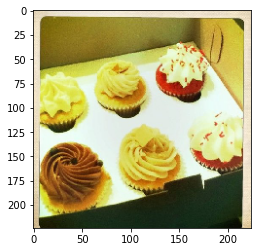

In [38]:
# predict 1 image
source = "test"
random_folder = np.random.choice(os.listdir(os.path.join(source)))
random_image = np.random.choice(os.listdir(os.path.join(source, random_folder)))
img = image.load_img(os.path.join(source, random_folder, random_image), target_size = (shape[0], shape[1]))
# img1="testine_img.jpeg"
plt.imshow(img)
img = image.img_to_array(img) / 255
img = np.expand_dims(img, axis = 0)
head, sep, tail = random_image.partition('.')
head = head.replace("_","")
random_image = ''.join([i for i in head if not i.isdigit()])
print("Actual:", random_folder)
print("Predicted:", labels[transfer.predict(img).argmax(axis=-1)[0]])

# Testing with downloaded images

Actual: frenchtoast.jpeg
Predicted: french_toast


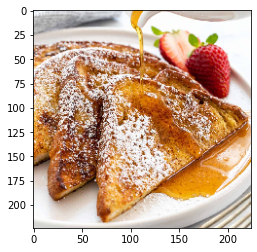

In [78]:
# predict 1 image
source = "frenchtoast.jpeg"
img = image.load_img(source, target_size = (shape[0], shape[1]))
# img1="testine_img.jpeg"
plt.imshow(img)
img = image.img_to_array(img) / 255
img = np.expand_dims(img, axis = 0)
head, sep, tail = random_image.partition('.')
head = head.replace("_","")
random_image = ''.join([i for i in head if not i.isdigit()])
print("Actual:", source)
print("Predicted:", labels[transfer.predict(img).argmax(axis=-1)[0]])

In [ ]:
Testing with downloaded images

Actual: pancakes.jpeg
Predicted: pancakes


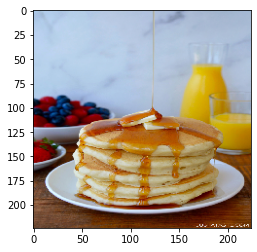

In [76]:
# predict 1 image
source = "pancakes.jpeg"
img = image.load_img(source, target_size = (shape[0], shape[1]))
# img1="testine_img.jpeg"
plt.imshow(img)
img = image.img_to_array(img) / 255
img = np.expand_dims(img, axis = 0)
head, sep, tail = random_image.partition('.')
head = head.replace("_","")
random_image = ''.join([i for i in head if not i.isdigit()])
print("Actual:", source)
print("Predicted:", labels[transfer.predict(img).argmax(axis=-1)[0]])

Actual: samosa.jpeg
Predicted: samosa


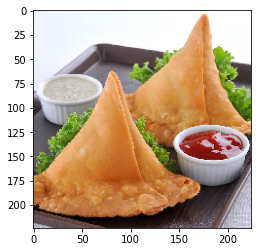

In [80]:
source = ["samosa.jpeg"]
for i in source:
    img = image.load_img(i, target_size = (shape[0], shape[1]))
# img1="testine_img.jpeg"
    plt.imshow(img)
    img = image.img_to_array(img) / 255
    img = np.expand_dims(img, axis = 0)
    head, sep, tail = random_image.partition('.')
    head = head.replace("_","")
    random_image = ''.join([i for i in head if not i.isdigit()])
    print("Actual:", i)
    print("Predicted:", labels[transfer.predict(img).argmax(axis=-1)[0]])
    

Actual: cake.jpeg
Predicted: red_velvet_cake


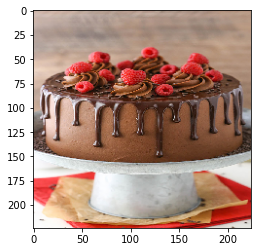

In [82]:
source = ["cake.jpeg"]
for i in source:
    img = image.load_img(i, target_size = (shape[0], shape[1]))
# img1="testine_img.jpeg"
    plt.imshow(img)
    img = image.img_to_array(img) / 255
    img = np.expand_dims(img, axis = 0)
    head, sep, tail = random_image.partition('.')
    head = head.replace("_","")
    random_image = ''.join([i for i in head if not i.isdigit()])
    print("Actual:", i)
    print("Predicted:", labels[transfer.predict(img).argmax(axis=-1)[0]])

In [53]:
#create prediction dataframe
filenames = test_generator.filenames
correct_labels = [filename[:filename.find("/")] for filename in filenames]
results = pd.DataFrame({"Filename": filenames, "Labels": correct_labels, "Predicted Label": predicted_labels})

In [56]:
results

In [55]:
## Plots the distribution of the predictions for a given dish


def plot_predictions_for_class(data, class_id, figsize=(10,7)):
   
    subset = data[data["Labels"] == class_id]
    plt.figure(figsize=figsize)
    plt.title("Count per Predicted Label")
    plt.xlabel("Food Item")
    plt.ylabel("Count")
    value_counts = subset["Predicted Label"].value_counts().plot(kind="bar")
    return value_counts

## Returns top k most accurate predictions
    
def get_most_accurate(data, k=1):

    subset = data[data["Labels"]==data["Predicted Label"]]
    results = (subset["Labels"].value_counts()/data["Labels"].value_counts()).sort_values(ascending=False)[:k]
    return results

In [49]:
get_most_accurate(results,10)

edamame                1.000
macarons               0.944
oysters                0.932
pad_thai               0.932
pho                    0.928
hot_and_sour_soup      0.928
sashimi                0.928
deviled_eggs           0.924
french_fries           0.924
spaghetti_carbonara    0.920
Name: Labels, dtype: float64

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline
plot_predictions_for_class(results, "apple pie")